In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Dropout, Input, concatenate, Conv2DTranspose,BatchNormalization
from tensorflow.keras.activations import leaky_relu, relu
from tensorflow.keras.models import Model
import numpy as np
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

In [2]:
n_fft = 1022
frame_size = 1022
patch_size = 128
hop_length = 768
freq_bin = 512
sampling_rate = 8192

In [3]:
# Contractio
inputs = Input((512,128,1))
print('input', inputs)
c1 = Conv2D(16, (5,5), strides=(2,2), kernel_initializer='he_normal', padding='same')(inputs)
c1 = BatchNormalization()(c1)
c1 = leaky_relu(x=c1, negative_slope=0.2)
print("c1", c1)

c2 = Conv2D(32, (5,5), strides=(2,2), kernel_initializer='he_normal', padding='same')(c1)
c2 = BatchNormalization()(c2)
c2 = leaky_relu(x=c2, negative_slope=0.2)
print("c2", c2)


c3 = Conv2D(64, (5,5), strides=(2,2), kernel_initializer='he_normal', padding='same')(c2)
c3 = BatchNormalization()(c3)
c3 = leaky_relu(x=c3, negative_slope=0.2)
print("c3", c3)


c4 = Conv2D(128, (5,5), strides = (2,2), kernel_initializer='he_normal', padding='same')(c3)
c4 = BatchNormalization()(c4)
c4 = leaky_relu(x = c4, negative_slope=0.2)
print("c4", c4)


c5 = Conv2D(256, (5,5), strides = (2,2), kernel_initializer='he_normal', padding='same')(c4)
c5 = BatchNormalization()(c5)
c5 = leaky_relu(x = c5, negative_slope=0.2)
print("c5", c5)


c6 = Conv2D(512, (5,5), strides = (2,2), kernel_initializer='he_normal', padding='same')(c5)
c6 = BatchNormalization()(c6)
c6 = leaky_relu(x = c6, negative_slope = 0.2)
print("c6", c6)


# Expansion
u7 = Conv2DTranspose(256, (5,5), strides = (2,2), padding='same', activation='relu')(c6)
u7 = BatchNormalization()(u7)
u7 = Dropout(0.5)(u7)
u7 = concatenate([c5, u7])
print("u7", u7)
c7 = Conv2D(256, (5,5),kernel_initializer = 'he_normal', padding='same')(u7)
c7 = BatchNormalization()(c7)
c7 = relu(c7)
print("c7", c7)

u8 = Conv2DTranspose(128, (5,5), strides = (2,2), padding = 'same', activation='relu')(c7)
u8 = BatchNormalization()(u8)
u8 = Dropout(0.5)(u8)
u8 = concatenate([c4, u8])
print("u8", u8)
c8 = Conv2D(128, (5,5),kernel_initializer = 'he_normal', padding = 'same')(u8)
c8 = BatchNormalization()(c8)
c8 = relu(c8)
print("c8", c8)

u9 = Conv2DTranspose(64, (5,5), strides=(2,2), padding='same', activation= 'relu')(c8)
u9 = BatchNormalization()(u9)
u9 = Dropout(0.5)(u9)
u9 = concatenate([u9, c3])
print("u9", u9)
c9 = Conv2D(64, (5,5),kernel_initializer = 'he_normal', padding = 'same')(u9)
c9 = BatchNormalization()(c9)
c9 = relu(c9)

print("c9", c9)


u10 = Conv2DTranspose(32, (5,5), strides=(2,2), padding='same', activation= 'relu')(c9)
u10 = BatchNormalization()(u10)
u10 = concatenate([u10, c2])
print("u10", u10)
c10 = Conv2D(32, (5,5),kernel_initializer = 'he_normal', padding = 'same')(u10)
c10 = BatchNormalization()(c10)
c10 = relu(c10)
print("c10", c10)


u11 = Conv2DTranspose(16, (5,5), strides=(2,2), padding='same', activation= 'relu')(c10)
u11 = BatchNormalization()(u11)
u11 = concatenate([u11, c1])
print("u11", u11)
c11 = Conv2D(16, (5,5),kernel_initializer = 'he_normal', padding = 'same')(u11)
c11 = BatchNormalization()(c11)
c11 = relu(c11)
print("c11", c11)

c12 = Conv2DTranspose(8, (5,5), strides=(2,2), padding='same')(c11)
c12 = BatchNormalization()(c12)
c12 = relu(c12)
print("c12", c12)

output = Conv2D(1, (1,1), padding='same', activation='sigmoid')(c12)
print("output", output)

input <KerasTensor shape=(None, 512, 128, 1), dtype=float32, sparse=False, name=keras_tensor>


2024-12-19 21:58:00.028947: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-12-19 21:58:00.028969: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-12-19 21:58:00.028973: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-12-19 21:58:00.028986: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-19 21:58:00.028994: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


c1 <KerasTensor shape=(None, 256, 64, 16), dtype=float32, sparse=False, name=keras_tensor_3>
c2 <KerasTensor shape=(None, 128, 32, 32), dtype=float32, sparse=False, name=keras_tensor_6>
c3 <KerasTensor shape=(None, 64, 16, 64), dtype=float32, sparse=False, name=keras_tensor_9>
c4 <KerasTensor shape=(None, 32, 8, 128), dtype=float32, sparse=False, name=keras_tensor_12>
c5 <KerasTensor shape=(None, 16, 4, 256), dtype=float32, sparse=False, name=keras_tensor_15>
c6 <KerasTensor shape=(None, 8, 2, 512), dtype=float32, sparse=False, name=keras_tensor_18>
u7 <KerasTensor shape=(None, 16, 4, 512), dtype=float32, sparse=False, name=keras_tensor_22>
c7 <KerasTensor shape=(None, 16, 4, 256), dtype=float32, sparse=False, name=keras_tensor_25>
u8 <KerasTensor shape=(None, 32, 8, 256), dtype=float32, sparse=False, name=keras_tensor_29>
c8 <KerasTensor shape=(None, 32, 8, 128), dtype=float32, sparse=False, name=keras_tensor_32>
u9 <KerasTensor shape=(None, 64, 16, 128), dtype=float32, sparse=False, 

In [4]:
model = Model(inputs = inputs, outputs = output)

In [5]:
X_train = np.load('Dataset/X_train.npy').astype(np.float32)
Y_train = np.load('Dataset/Y_train_other.npy').astype(np.float32)

X_train = np.transpose(X_train, (2, 0, 1))  # Change to (469, 512, 128)
X_train = X_train[..., np.newaxis]  # Add channel dimension, shape becomes (469, 512, 128, 1)

Y_train = np.transpose(Y_train, (2, 0, 1))  # Change to (469, 512, 128)
Y_train = Y_train[..., np.newaxis]  # Add channel dimension, shape becomes (469, 512, 128, 1)

X_train.shape, Y_train.shape

((469, 512, 128, 1), (469, 512, 128, 1))

In [6]:
dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))

# Shuffle, batch, and prefetch the data
batch_size = 32  # Or use len(X_train) for full-batch
dataset = dataset.shuffle(buffer_size=100).batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [7]:
def loss_function(y_true, y_pred):
    return tf.reduce_mean(tf.abs(y_pred - y_true))  # L1 loss (Mean Absolute Error)


In [8]:
optimizer = tf.keras.optimizers.Adam()

In [9]:
# Loop over epochs for model
epochs = 40
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    epoch_loss = 0;
    # Loop over batches in the dataset
    for batch, (mixed_batch, target_batch) in enumerate(dataset):
        with tf.GradientTape() as tape:
            # Forward pass: Get predictions from the model
            predicted_mask = model(mixed_batch, training=True)

            # Apply the mask to the mixed spectrogram
            predicted_spectrogram = predicted_mask * mixed_batch
            
            # Compute the loss
            loss = loss_function(target_batch, predicted_spectrogram)
        
        # Compute gradients
        gradients = tape.gradient(loss, model.trainable_variables)
        
        # Apply gradients
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
        # Optionally, print loss or metrics after every batch
        epoch_loss += loss.numpy()
    print(f"Loss = {epoch_loss}")

Epoch 1/40


2024-12-19 21:58:13.967541: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.15666479151695967
Epoch 2/40


2024-12-19 21:58:21.058094: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.1442475439980626
Epoch 3/40


2024-12-19 21:58:28.129352: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.13948426768183708
Epoch 4/40


2024-12-19 21:58:35.413108: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.13669028598815203
Epoch 5/40


2024-12-19 21:58:42.616878: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.13398343650624156
Epoch 6/40


2024-12-19 21:58:49.990573: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.13197211362421513
Epoch 7/40


2024-12-19 21:58:57.253379: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.13029825408011675
Epoch 8/40


2024-12-19 21:59:04.894236: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.12889322731643915
Epoch 9/40


2024-12-19 21:59:12.202649: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.12743940064683557
Epoch 10/40


2024-12-19 21:59:19.900652: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.12652018200606108
Epoch 11/40


2024-12-19 21:59:27.214421: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.1262976061552763
Epoch 12/40


2024-12-19 21:59:34.526390: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.12527394713833928
Epoch 13/40


2024-12-19 21:59:41.901121: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.12415420822799206
Epoch 14/40


2024-12-19 21:59:49.156457: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.12370963208377361
Epoch 15/40


2024-12-19 21:59:56.972901: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.1234716260805726
Epoch 16/40


2024-12-19 22:00:04.393147: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.122694899328053
Epoch 17/40


2024-12-19 22:00:12.353792: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.12096464447677135
Epoch 18/40


2024-12-19 22:00:20.309786: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.1210645823739469
Epoch 19/40


2024-12-19 22:00:27.608617: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.1203685300424695
Epoch 20/40


2024-12-19 22:00:35.073794: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.11957316938787699
Epoch 21/40


2024-12-19 22:00:42.434749: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.11911184107884765
Epoch 22/40


2024-12-19 22:00:49.769199: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.11882557580247521
Epoch 23/40


2024-12-19 22:00:57.228283: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.1186082842759788
Epoch 24/40


2024-12-19 22:01:04.613508: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.11927310703322291
Epoch 25/40


2024-12-19 22:01:12.006812: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.11760078044608235
Epoch 26/40


2024-12-19 22:01:19.344292: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.11833761399611831
Epoch 27/40


2024-12-19 22:01:26.752846: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.11703360266983509
Epoch 28/40


2024-12-19 22:01:34.137439: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.11680877581238747
Epoch 29/40


2024-12-19 22:01:41.543836: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.11658873315900564
Epoch 30/40


2024-12-19 22:01:49.102235: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.11588564421981573
Epoch 31/40


2024-12-19 22:01:56.636699: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.11609922861680388
Epoch 32/40


2024-12-19 22:02:04.040048: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.11605163523927331
Epoch 33/40


2024-12-19 22:02:11.373656: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.11575974011793733
Epoch 34/40


2024-12-19 22:02:18.798668: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.11514239246025681
Epoch 35/40


2024-12-19 22:02:26.186538: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.11514908261597157
Epoch 36/40


2024-12-19 22:02:33.585557: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.11489953799173236
Epoch 37/40


2024-12-19 22:02:41.028580: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.11520469840615988
Epoch 38/40


2024-12-19 22:02:48.310208: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.11495339870452881
Epoch 39/40


2024-12-19 22:02:55.695501: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loss = 0.11498621897771955
Epoch 40/40
Loss = 0.11428435938432813


2024-12-19 22:03:03.011167: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [10]:
# Define a function to extract patches
def extract_patches(spectrogram, patch_size):
    num_frames = spectrogram.shape[1] 
    patches = []
    
    for i in range(0, num_frames - patch_size + 1, patch_size):
        # Slice a patch of 128 frames
        patch = spectrogram[:, i:i + patch_size]
        patches.append(patch)
    patches = np.stack(patches, axis=-1)
    return patches

def reconstruct_signal(patches):
    # Extract dimensions
    freq_bin, patch_size, num_of_patches = patches.shape

    # Reconstruct the original signal by concatenating patches along the time axis
    reconstructed_signal = np.zeros((freq_bin, patch_size * num_of_patches), dtype=patches.dtype)

    for index in range(num_of_patches):
        start_idx = index * patch_size
        reconstructed_signal[:, start_idx:start_idx + patch_size] = patches[:, :, index]

    return reconstructed_signal

def reconstruct_signal_from_patches(patches, phase,freq_bin, hop_length, frame_size):
    y_mag = reconstruct_signal(patches)
    y_complex = y_mag * np.exp(1j * phase[:,:y_mag.shape[1]])
    y_reconst = librosa.istft(y_complex, n_fft=frame_size, hop_length=hop_length)
    return y_reconst

In [11]:
def isolate_voice(audio_path):
    y, sr = librosa.load(audio_path, sr=sampling_rate)
    D = librosa.stft(y, n_fft=frame_size, hop_length=hop_length)
    magnitude_s = np.abs(D)
    phases = np.angle(D)
    
    magnitude_s = magnitude_s/np.max(magnitude_s)
    patches = extract_patches(magnitude_s, patch_size)
    
    patches = np.transpose(patches, (2, 0, 1))  # Change to (469, 512, 128)
    patches = patches[..., np.newaxis]  # Add channel dimension, shape becomes (469, 512, 128, 1)

    y_mask = model.predict(patches)
    modified_patches = patches * y_mask


    # Remove the channel dimension
    modified_patches = modified_patches.squeeze(-1)  # Shape becomes (14, 512, 128)
    
    # Transpose to match the expected shape for reconstruct_signal_from_patches
    modified_patches = np.transpose(modified_patches, (1, 2, 0))  # Shape becomes (512, 128, 14)
    
    y_isolated = reconstruct_signal_from_patches(modified_patches, phases, freq_bin, hop_length, frame_size)
    print(y_isolated.shape)
    # background = y[:len(y_isolated)] - y_isolated
    return y_isolated

In [12]:
audio_file_path = 'Dataset2/mixture.wav'
audio_file_path = 'Dataset2/song.mp3'

In [13]:
isolated = isolate_voice(audio_file_path)
ipd.Audio(isolated, rate=sampling_rate)

2024-12-19 22:03:04.384705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step
(1768704,)


In [14]:
ipd.Audio(audio_file_path, rate= sampling_rate)

In [15]:
librosa.display.waveshow(isolated)
plt.title("bass signal")

Text(0.5, 1.0, 'bass signal')

Text(0.5, 1.0, 'original audio signal')

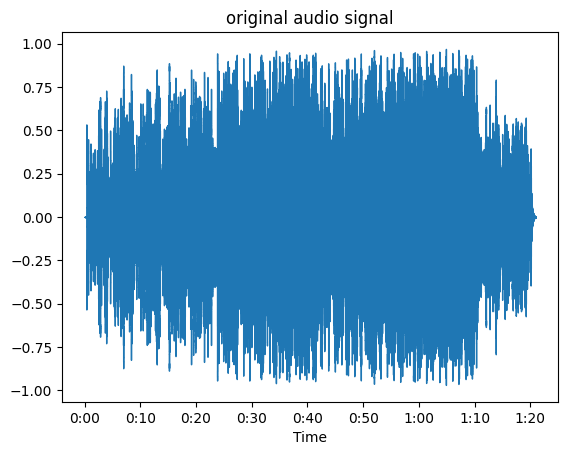

In [16]:
actual_audio,sr = librosa.load(audio_file_path, sr=sampling_rate)
librosa.display.waveshow(actual_audio)
plt.title("original audio signal")